In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
#IMPORTING THE REQUIRED LIBRARIES

In [65]:
#IMPORTING THE CLEANED-UP DATASET

df = pd.read_csv("house_prediction_train_data.csv")


In [66]:
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,0.5,1.0,1.0,...,0.75,0.5,0.0,0.090909,0.50,1.0,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,0.5,1.0,1.0,...,0.75,0.5,0.0,0.363636,0.25,1.0,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,0.5,0.0,1.0,...,0.75,0.5,0.0,0.727273,0.50,1.0,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,0.5,0.0,1.0,...,0.75,0.5,0.0,0.090909,0.00,1.0,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,0.5,0.0,1.0,...,0.75,0.5,0.0,1.000000,0.50,1.0,0.75,0.0,0.0,0.0


In [67]:
df.shape

(1460, 84)

In [68]:


X = df.drop(['SalePrice'],axis=1)

#DEFINING THE TARGET VARIABLE
y= df['SalePrice']

In [69]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,0.235294,0.75,0.418208,0.366344,1.0,0.5,1.0,1.0,0.0,...,0.75,0.5,0.00000,0.090909,0.50,1.0,0.75,0.0,0.0,0.0
1,2,0.000000,0.75,0.495064,0.391317,1.0,0.5,1.0,1.0,0.0,...,0.75,0.5,0.00000,0.363636,0.25,1.0,0.75,0.0,0.0,0.0
2,3,0.235294,0.75,0.434909,0.422359,1.0,0.5,0.0,1.0,0.0,...,0.75,0.5,0.00000,0.727273,0.50,1.0,0.75,0.0,0.0,0.0
3,4,0.294118,0.75,0.388581,0.390295,1.0,0.5,0.0,1.0,0.0,...,0.75,0.5,0.00000,0.090909,0.00,1.0,0.00,0.0,0.0,0.0
4,5,0.235294,0.75,0.513123,0.468761,1.0,0.5,0.0,1.0,0.0,...,0.75,0.5,0.00000,1.000000,0.50,1.0,0.75,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.235294,0.75,0.400718,0.353592,1.0,0.5,1.0,1.0,0.0,...,0.75,0.5,0.00000,0.636364,0.25,1.0,0.75,0.0,0.0,0.0
1456,1457,0.000000,0.75,0.517503,0.453273,1.0,0.5,1.0,1.0,0.0,...,1.00,0.5,0.00000,0.090909,1.00,1.0,0.75,0.0,0.0,0.0
1457,1458,0.294118,0.75,0.423859,0.379597,1.0,0.5,1.0,1.0,0.0,...,0.00,1.0,0.16129,0.363636,1.00,1.0,0.75,0.0,0.0,0.0
1458,1459,0.000000,0.75,0.434909,0.393688,1.0,0.5,1.0,1.0,0.0,...,0.75,0.5,0.00000,0.272727,1.00,1.0,0.75,0.0,0.0,0.0


In [70]:
#CREATING A LINEAR REGRESSION MODEL

linear_model = LinearRegression()

In [71]:
#EVALUATING THE MODEL PERFORMANCE USING MSE CRITERIA

mse = cross_val_score(linear_model,X,y,scoring='neg_mean_squared_error',cv=5,error_score= 'raise')

In [72]:
print(mse)

[-0.01560849 -0.02221282 -0.01621301 -0.01361808 -0.02707128]


In [73]:
#CREATING A RIDGE MODEL

ridge = Ridge()

In [74]:
#DEFINING A SET OF REGULARIZATION PARAMETERS USED IN RIDGE

params = {'alpha':[1e-15,1e-10,1e-5,1e-2,1,2,5,10,25,50,100,150,200,250,300,500,1000]}

In [75]:
#GRID-SEARCHCV RETURNS AN ESTIMATOR WITH THE BEST ALPHA PARAMETER VALUE

ridge_regressor = GridSearchCV(estimator = ridge,param_grid = params,scoring = 'neg_mean_squared_error',cv =5)

#ESTIMATOR IS FIT

ridge_regressor.fit(X,y)

/home/kaatilkabootar/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.09872e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kaatilkabootar/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.7717e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kaatilkabootar/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.24601e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kaatilkabootar/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.07786e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kaatilkabootar/

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 2, 5, 10, 25,
                                   50, 100, 150, 200, 250, 300, 500, 1000]},
             scoring='neg_mean_squared_error')

In [76]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-10}
-0.018944736247670443


In [77]:
lasso = Lasso()
params = {'alpha':[1e-15,1e-10,1e-5,1e-2,1,2,5,10,25,50,100,150,200,250,300,500,1000]}
lasso_regressor = GridSearchCV(estimator = lasso, param_grid= params ,scoring = "neg_mean_squared_error",cv=5)
lasso_regressor.fit(X,y)

/home/kaatilkabootar/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.611e+00, tolerance: 1.891e-02
  model = cd_fast.enet_coordinate_descent(
/home/kaatilkabootar/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.636e+00, tolerance: 1.800e-02
  model = cd_fast.enet_coordinate_descent(
/home/kaatilkabootar/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 2, 5, 10, 25,
                                   50, 100, 150, 200, 250, 300, 500, 1000]},
             scoring='neg_mean_squared_error')

In [78]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-0.018944738773847537


In [79]:
#SPLITTING THE DATASET INTO TRAIN AND TEST DATA

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size =0.3,random_state =0)

In [80]:
#PREDICTIONS ARE STORED IN THESE VARIABLES

predict_ridge = ridge_regressor.predict(xtest)
predict_lasso = lasso_regressor.predict(xtest)

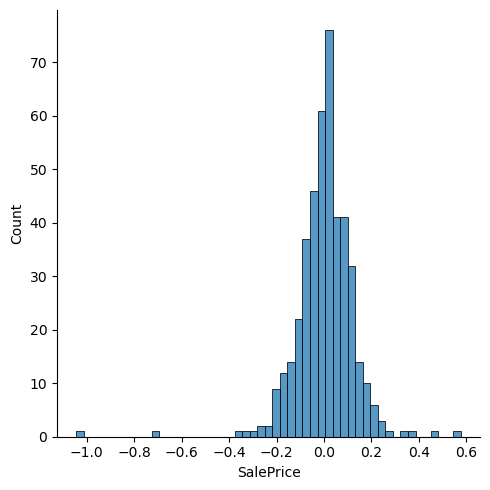

In [81]:
#DIFFERENCE BETWEEN BOTH ACTUAL VALUES AND PREDICTED VALUES IS CONVERTED INTO A GRAPH 

#IT SHOWS HOW MANY TIMES IS THE MODEL DEVIATING FROM THE ACTUAL VALUE BY SHOWING THE DIFFERENCES AND COUNT PLOT
sns.displot(ytest-predict_ridge)

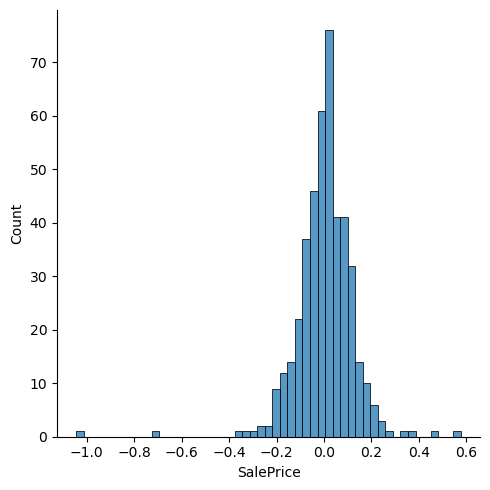

In [82]:
sns.displot(ytest-predict_lasso)

In [83]:
#SIMILARLY HERE THE MEDIAN VALUE OF DEVIATION FROM THE ACTUAL VALUE IS SHOWN.

print((ytest-predict_ridge).median())

0.009650000460991848


In [84]:
print((ytest-predict_lasso).median())

0.009650000097518152
